In [1]:

from models_otimizador import otimizador
import pandas as pd
import json

import logging

# Configurar o logging para mostrar mensagens INFO
# permitir uso de acentos no formato
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # Para mostrar no output do notebook
    ],
    style='%'
)

# Ou de forma mais simples:
logging.getLogger().setLevel(logging.INFO)


%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# Resumo dos resultados

In [2]:
# Importar resultados das runs de saidas/saidas.json
with open('saidas/saidas.json', 'r') as f:
    resultados = json.load(f)
    
# Transformar em DataFrame para melhor visualização em que cada run é uma linha
df_resultados = pd.DataFrame(resultados).T
# Transformar as keys dos valores da coluna options em novas colunas
options_df = df_resultados['options'].apply(pd.Series)
# substituir coluna options pelas colunas expandidas
df_resultados = pd.concat([df_resultados.drop(columns=['options']), options_df], axis=1)
# fazer o mesmo com os valores da coluna custos
custos_df = df_resultados['custos'].apply(pd.Series)
df_resultados = pd.concat([df_resultados.drop(columns=['custos']), custos_df], axis=1)

# Formatar os valores numéricos com separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_resultados

,nome,status,solution_time,objective_value,NO_BOG,BOG_CTE,BOG_VAR,BOG_TEST,TIMELIMIT,custo_fixo,custo_spot,custo_lcp,custo_demurrage,custo_top,custo_total
1,Cen1,Solução ótima encontrada,2.84,"1,055,165,920.60",True,False,False,False,1000,"118,374,400.00","276,504,480.60","618,856,000.00","41,431,040.00",0.00,"1,055,165,920.60"
2,Cen1,Solução ótima encontrada,2.11,"1,075,457,920.60",False,True,False,False,1000,"118,374,400.00","296,796,480.60","618,856,000.00","41,431,040.00",0.00,"1,075,457,920.60"
3,Cen1,Solução ótima encontrada,540.64,"1,304,875,486.15",False,False,True,False,1000,"118,374,400.00","466,890,925.02","496,650,000.00","41,431,040.00","181,529,121.13","1,304,875,486.15"
4,Cen1,Solução ótima encontrada,0.54,"1,075,457,920.60",False,True,False,True,1000,"118,374,400.00","296,796,480.60","618,856,000.00","41,431,040.00",0.00,"1,075,457,920.60"
5,Cen1,Solução ótima encontrada,0.29,"1,075,457,920.60",False,True,False,True,1000,"118,374,400.00","296,796,480.60","618,856,000.00","41,431,040.00",0.00,"1,075,457,920.60"


# Leitura de arquivos de entrada

In [4]:
arquivo_excel = 'entradas/entradas.xlsx'
arquivo_json = 'entradas/entradas.json'
nome = 'Cen1'
run = 5

option1 = {
    "NO_BOG": True,
    "BOG_CTE": False,
    "BOG_VAR": False,
    "BOG_TEST": False,
    "TIMELIMIT": 1000
}

option2 = {
    "NO_BOG": False,
    "BOG_CTE": True,
    "BOG_VAR": False,
    "BOG_TEST": False,
    "TIMELIMIT": 1000
}

option3 = {
    "NO_BOG": False,
    "BOG_CTE": False,
    "BOG_VAR": True,
    "BOG_TEST": False,
    "TIMELIMIT": 1000
}

option4 = {
    "NO_BOG": False,
    "BOG_CTE": True,
    "BOG_VAR": False,
    "BOG_TEST": True,
    "TIMELIMIT": 1000
}

option5 = {
    "NO_BOG": False,
    "BOG_CTE": False,
    "BOG_VAR": True,
    "BOG_TEST": True,
    "TIMELIMIT": 1000
}

if run == 1:
    options = option1
elif run == 2:
    options = option2
elif run == 3:
    options = option3
elif run == 4:
    options = option4
elif run == 5:
    options = option5
logging.info(f'Rodando simulação {run} com opções: {options}')

2025-11-26 09:58:45,522 - INFO - Rodando simulação 5 com opções: {'NO_BOG': False, 'BOG_CTE': False, 'BOG_VAR': True, 'BOG_TEST': True, 'TIMELIMIT': 1000}


# Execução do Otimizador

In [5]:
opt = otimizador(nome, arquivo_json, arquivo_excel, options)

opt.solve_model()

if opt.model.sol_status == 1:
    status = "Solução ótima encontrada"

elif opt.model.sol_status == 2:
    status = "Solução encontrada"

else:
    if opt.model.sol_status == 0:
        status = "ERRO! Nenhuma solução encontrada"

    elif opt.model.sol_status == -1:
        status = "ERRO! Problema sem solução"

    elif opt.model.sol_status == -2:
        status = "ERRO! Infinitas soluções possíveis"
print(status)



2025-11-26 09:58:54,580 - INFO - Carregando parâmetros para o cenário Cen1.
2025-11-26 09:58:55,571 - INFO - Parâmetros carregados para o cenário Cen1. Iniciando otimização.
2025-11-26 09:58:55,573 - INFO - Iniciando definição do modelo de otimização.
2025-11-26 09:58:55,575 - INFO - Variáveis de decisão x e y definidas.
2025-11-26 09:58:55,599 - INFO - Definição das restrições do modelo de otimização.


KeyError: 0

# Extração de resultados

In [54]:
opt.extrair_resultados()

2025-11-20 19:31:17,507 - INFO - Extraindo resultados para a variável x.
2025-11-20 19:31:17,508 - INFO - Extraindo resultados para a variável s.
2025-11-20 19:31:17,509 - INFO - Extraindo resultados para a variável b.
2025-11-20 19:31:17,509 - INFO - Extraindo resultados para a variável cc_acc.
2025-11-20 19:31:17,510 - INFO - Extraindo resultados para a variável topc.
2025-11-20 19:31:17,511 - INFO - Extraindo resultados para a variável ca_acc.
2025-11-20 19:31:17,512 - INFO - Extraindo resultados para a variável lgc.
2025-11-20 19:31:17,514 - INFO - ExtraÃ§Ã£o finalizada. 


In [55]:
# INDICES E CONJUNTOS
T, I, J, M, C, TP, CF, N = (
    opt.entradas["T"],
    opt.entradas["I"],
    opt.entradas["J"],
    opt.entradas["M"],
    opt.entradas["C"],
    opt.entradas["TP"],
    opt.entradas["CF"],
    opt.entradas["N"],
)
J1 = range(len(opt.entradas["J"]) - 1)

# informações de custos da função objetivo
PS = opt.entradas["PS"]
custo_fixo = sum([pulp.lpSum(opt.resultado_modelo['y'][j][t] for j in J) * opt.entradas["K"] for t in T])
custo_fixo = custo_fixo.value()
# custo_imobilizacao = sum([opt.resultado_modelo['s'][t] * opt.entradas["SW"] * opt.entradas["PS_MEAN"] for t in T])
custo_spot = sum([opt.resultado_modelo['x'][t] * PS[t] for t in T])
custo_lcp = sum([
    opt.entradas['LCP'][(j, c, t)] * opt.entradas['W'][(j, t)] * opt.resultado_modelo["lgc"][j][c][t]
    for j in TP for c in C for t in T])
custo_demurrage = sum([
    opt.resultado_modelo['y'][j][t] * opt.entradas["PDEM"] * opt.entradas["DEM"][(j, t)]
    for j in TP for t in T])
custo_top = sum([
    opt.resultado_modelo['topc'][j][m][t] * opt.entradas['W'][(j, t)] * opt.entradas["TPT"][(j, m, t)]
    for j in TP for m in M for t in T])

custo_total = custo_fixo + custo_spot + custo_lcp + custo_demurrage + custo_top

In [56]:
print(f"Custo fixo: {custo_fixo}, {type(custo_fixo)}")
print(f"Custo spot: {custo_spot}, {type(custo_spot)}")
print(f"Custo LCP: {custo_lcp}, {type(custo_lcp)}")
print(f"Custo demurrage: {custo_demurrage}, {type(custo_demurrage)}")
print(f"Custo take or pay: {custo_top}, {type(custo_top)}")
print(f"Custo total: {custo_total}, {type(custo_total)}")

Custo fixo: 118374400.00000001, <class 'float'>
Custo spot: 296796480.6, <class 'float'>
Custo LCP: 618856000.0, <class 'float'>
Custo demurrage: 41431040.0, <class 'float'>
Custo take or pay: 0.0, <class 'float'>
Custo total: 1075457920.6, <class 'float'>


## Fixando variáveis para teste de BOG

In [ ]:
# arquivo_json = 'entradas/entradas.json'
# with open(arquivo_json, 'r', encoding='utf-8') as f:
#     dados = json.load(f)
    
# dados[nome]["variaveis_fixadas"]["x"] = opt.resultado_modelo["x"]
# dados[nome]["variaveis_fixadas"]["y"] = opt.resultado_modelo["y"]

# # salvar de volta no arquivo entradas.json
# with open('entradas/entradas.json', 'w') as f:
#     json.dump(dados, f, indent=4)

# Escrita das saídas

In [10]:
# # Compras LTC por contrato j
# for j in J1:
#     # Extraindo planejamento de chegada de carga LTC
#     i_0 = 0
#     i_1 = 0
#     W_date = []
#     for t in T:
#         i_0 = opt.entradas['W'][(j,t)]
#         if i_0 == 0:
#             W_date.append(0)
#         elif i_0 != 0 and i_1 ==0:
#             W_date.append(i_0)
#         else: 
#             W_date.append(0)
        
#         i_1 = i_0
        
# VT = sum(W_date)
# cat1 = VT*0.6
# cat2 = cat1 + VT*0.25
# cat3 = cat2 + VT*0.15
# print(f"VT: {VT}")
# print(f"Categoria 1 (60%): {cat1}")
# print(f"Categoria 2 (25%): {cat2}")
# print(f"Categoria 3 (15%): {cat3}")

In [57]:
# lê json de saídas
saidas_json = json.load(open('saidas/saidas.json', 'r'))

# saidas_json = {}
# adiciona novo resultado
saidas_json[f"{run}"] = {
    'nome': nome,
    'options': options,
    'status': status,
    'solution_time': opt.resultado_modelo["solution_time"],
    'objective_value': opt.resultado_modelo["objective_value"],
    'custos': {
        'custo_fixo': custo_fixo,
        # 'custo_imobilizacao': custo_imobilizacao,
        'custo_spot': custo_spot,
        'custo_lcp': custo_lcp,
        'custo_demurrage': custo_demurrage,
        'custo_top': custo_top,
        'custo_total': custo_total
    },
    
    
}

path = f'saidas/saidas.json'
with open(path, 'w') as f:
    json.dump(saidas_json, f, indent=4)

# Plot de resultados


In [135]:
cc_acc = opt.resultado_modelo['cc_acc'][0][-1]
ca_acc = opt.resultado_modelo['ca_acc'][0][-1]
print(ca_acc)
print(cc_acc)
print(cc_acc + ca_acc)

752500.0
602000.0
1354500.0


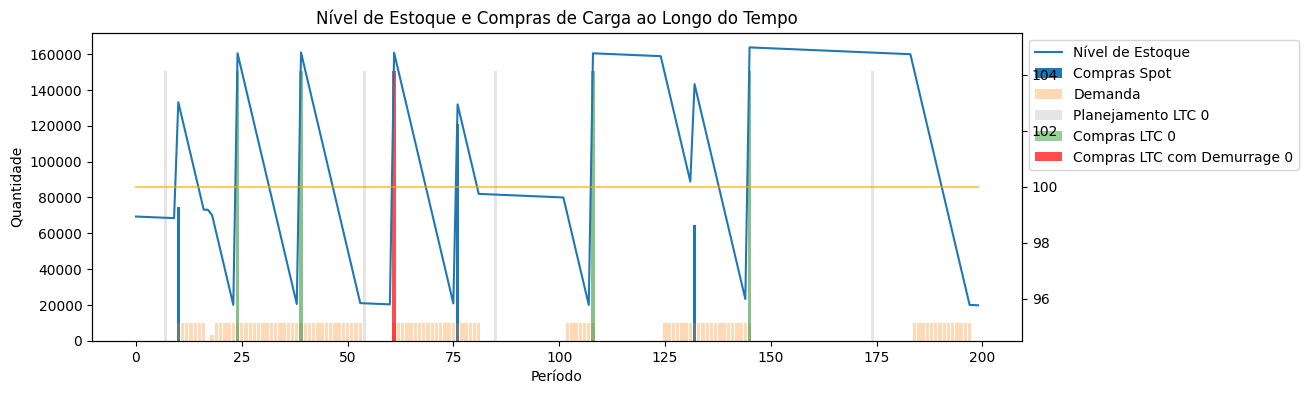

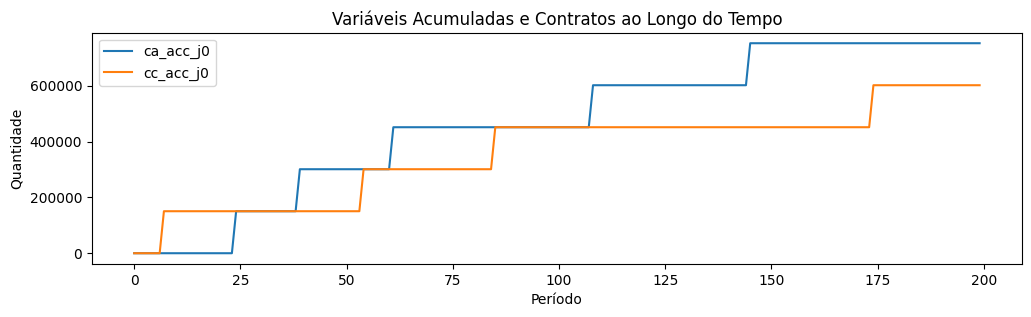

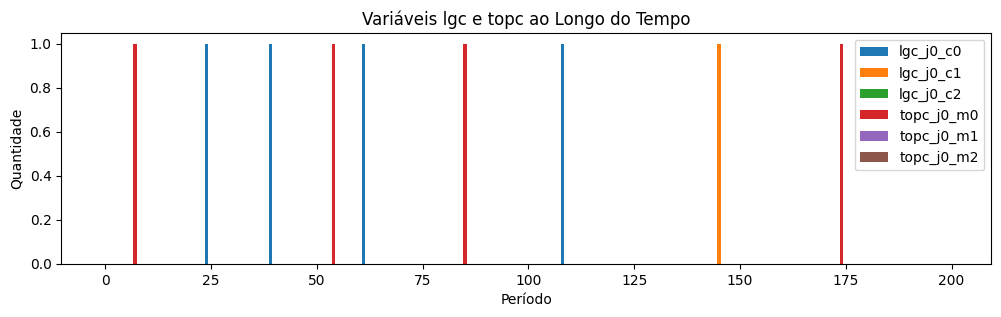

In [58]:
import matplotlib.pyplot as plt

# criar a pasta saidas/graficos se não existir
import os
os.makedirs('saidas/graficos', exist_ok=True)

fig, ax = plt.subplots(figsize=(12, 4))

# Nível do estoque
ax.plot(T, opt.resultado_modelo["s"], label="Nível de Estoque")

# Compras carga spot
ax.bar(T, opt.resultado_modelo["x"], label="Compras Spot")

# Quantidade de BOG gerada
if opt.options["BOG_CTE"] or opt.options["BOG_VAR"] or opt.options["BOG_TEST"]:
    ax2 = ax.twinx()
    ax2.plot(T, opt.resultado_modelo["b"], label="BOG", color='orange', alpha=0.6)

# Demanda
demanda = [sum([opt.entradas["D"][(i, t)] for i in I]) for t in T]
ax.bar(T, demanda, label=f"Demanda",  alpha=0.3)


# Compras LTC por contrato j
for j in J1:
    # Extraindo planejamento de chegada de carga LTC
    i_0 = 0
    i_1 = 0
    W_date = []
    for t in T:
        i_0 = opt.entradas['W'][(j,t)]
        if i_0 == 0:
            W_date.append(0)
        elif i_0 != 0 and i_1 ==0:
            W_date.append(i_0)
        else: 
            W_date.append(0)
        
        i_1 = i_0
    
    # Extraindo compras com demurrage e sem demurrage
    compras_ltc_regular = []
    compras_ltc_demurrage = []
    for t in T:
        compra = opt.entradas['W'][(j, t)] * opt.resultado_modelo["y"][j][t]
        demurrage = opt.entradas['DEM'][(j, t)] * opt.resultado_modelo["y"][j][t]
        if demurrage > 0:
            compras_ltc_demurrage.append(compra)
            compras_ltc_regular.append(0)
        else:
            compras_ltc_regular.append(compra)
            compras_ltc_demurrage.append(0)
    
    ax.bar(T,W_date,label=f"Planejamento LTC {j}", alpha=0.2, color= 'grey')
    
    ax.bar(
        T,
        compras_ltc_regular,
        label=f"Compras LTC {j}",
        alpha=0.5
    )
    ax.bar(T, compras_ltc_demurrage, label=f"Compras LTC com Demurrage {j}", alpha=0.7, color='red')
    
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Nível de Estoque e Compras de Carga ao Longo do Tempo")
# posicionar legenda fora do gráfico
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# salvar figura na pasta saidas com o nome do cenário e run
plt.savefig(f'saidas/graficos/{nome}_run{run}_estoque_compras.png', bbox_inches='tight')
plt.show()

# Plot de linha com variáveis cc_acc, ca_acc, 
fig, ax = plt.subplots(figsize=(12, 3))
for j in J1:
    ax.plot(T, opt.resultado_modelo["ca_acc"][j], label=f"ca_acc_j{j}")
    ax.plot(T, opt.resultado_modelo["cc_acc"][j], label=f"cc_acc_j{j}")
    
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Variáveis Acumuladas e Contratos ao Longo do Tempo")
ax.legend()
plt.savefig(f'saidas/graficos/{nome}_run{run}_variaveis_acumuladas.png', bbox_inches='tight')
plt.show()

# Plot de barra com variáveis lgc e topc para cada nível, contrato j e periodo t
fig, ax = plt.subplots(figsize=(12, 3))
for j in J1:
    for c in C:
        ax.bar(
            T,
            opt.resultado_modelo["lgc"][j][c],
            label=f"lgc_j{j}_c{c}"
        )  
    for m in M:
        ax.bar(
            T,
            opt.resultado_modelo["topc"][j][m],
            label=f"topc_j{j}_m{m}"
        )
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Variáveis lgc e topc ao Longo do Tempo")
ax.legend()
plt.savefig(f'saidas/graficos/{nome}_run{run}_variaveis_lgc_topc.png', bbox_inches='tight')
plt.show()

In [ ]:

resultados_df = pd.DataFrame({"Período": T})
resultados_df.set_index("Período", inplace=True)
resultados_df["Compras_Spot"] = opt.resultado_modelo["x"]
resultados_df["Nível_Estoque"] = opt.resultado_modelo["s"]
for j in J1:
    resultados_df[f"Compras_LTC_j{j}"] = [opt.entradas['W'][(j, t)] * opt.resultado_modelo["y"][j][t] for t in T]
    resultados_df[f"ca_acc_j{j}"] = opt.resultado_modelo["ca_acc"][j]
    resultados_df[f"cc_acc_j{j}"] = opt.resultado_modelo["cc_acc"][j]
    for c in C:
        resultados_df[f"lgc_j{j}_c{c}"] = [
            opt.resultado_modelo["lgc"][j][c][t] for t in T
        ]
    for m in M:
        resultados_df[f"topc_j{j}_m{m}"] = [
            opt.resultado_modelo["topc"][j][m][t] for t in T
        ]

# fazer com que a saída do dataframe seja exibida com todas as linhas e colunas
pd.set_option('display.max_rows', None)


In [ ]:
# salvar df em excel na pasta saídas. Criar o arquivo se não existir chamado saidas.xlsx. Atribuir o df a uma aba com o nome do cenário e run. Se a aba já existir, sobrescrever.
import os


path = 'saidas/saidas.xlsx'
with pd.ExcelWriter(path, engine='openpyxl', if_sheet_exists='replace', mode='a' if os.path.exists(path) else 'w') as writer:
    resultados_df.to_excel(writer, sheet_name=f'{nome}_run{run}')

In [ ]:
resultados_df

,Compras_Spot,Nível_Estoque,Compras_LTC_j0,ca_acc_j0,cc_acc_j0,lgc_j0_c0,lgc_j0_c1,lgc_j0_c2,topc_j0_m0,topc_j0_m1,topc_j0_m2
Período,,,,,,,,,,,
0,0.00,69452.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,69452.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,69452.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,69452.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,69452.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,69202.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,69202.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,69202.21,0.0,0.0,150500.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.00,69202.21,0.0,0.0,150500.0,0.0,0.0,0.0,0.0,0.0,0.0


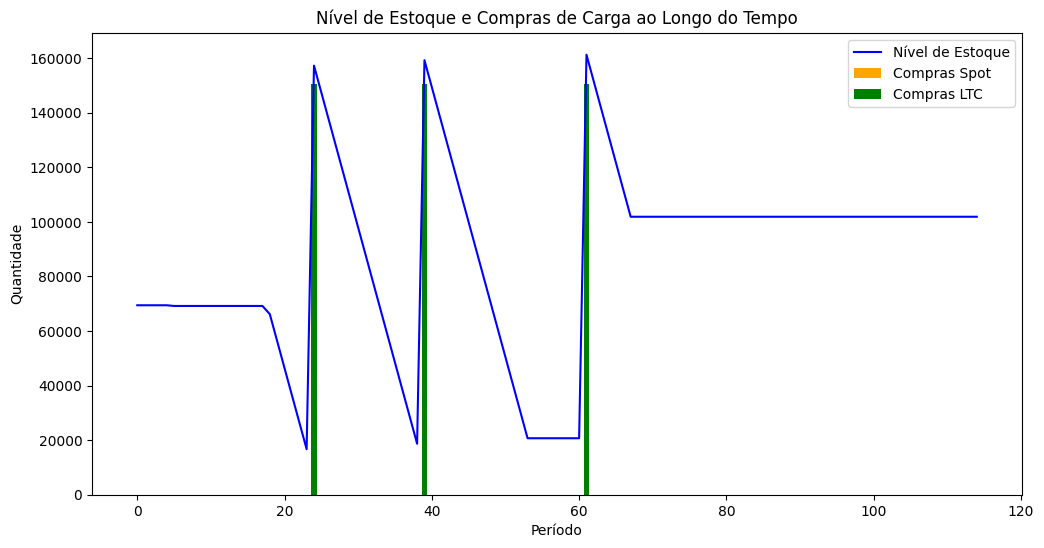

In [ ]:




        
W = [opt.entradas['W'][(0,t)] for t in T]    

compras_ltc = [W[i] * opt.resultado_modelo["y"][0][i] for i in range(len(W))]    
        

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(opt.number_index, opt.resultado_modelo["s"], label="Nível de Estoque", color="blue")
ax.bar(opt.number_index, opt.resultado_modelo["x"], label="Compras Spot", color="orange")

ax.bar(opt.number_index,compras_ltc, label=f"Compras LTC", color="green")
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Nível de Estoque e Compras de Carga ao Longo do Tempo")
ax.legend()
plt.show()